In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_original = pd.read_csv('apartment_dotcom.csv')

In [3]:
df = df_original.copy()

In [4]:
df.head()

,Unnamed: 0,url,listingid,ZIP,Monthly Rent,Bedrooms,Bathrooms,Square Feet,walkScore,transitScore,Deposit,latitude,longitude,Pet,neighborhood
0,0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218.000,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208.000,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220.000,"$1,193 - $2,805",1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville
3,3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250.000,"$1,795",3 bd,2 ba,"2,500 sq ft",54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237.000,"$1,095",3 bd,1 ba,"1,439 sq ft",29,32,NaN,39.722,-86.121,NaN,University Heights


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    704 non-null    int64  
 1   url           704 non-null    object 
 2   listingid     693 non-null    object 
 3   ZIP           693 non-null    float64
 4   Monthly Rent  680 non-null    object 
 5   Bedrooms      680 non-null    object 
 6   Bathrooms     680 non-null    object 
 7   Square Feet   664 non-null    object 
 8   walkScore     693 non-null    object 
 9   transitScore  693 non-null    object 
 10  Deposit       162 non-null    object 
 11  latitude      693 non-null    float64
 12  longitude     693 non-null    float64
 13  Pet           36 non-null     float64
 14  neighborhood  693 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 82.6+ KB


In [6]:
df.describe()

,Unnamed: 0,ZIP,latitude,longitude,Pet
count,704.000,693.000,693.000,693.000,36.000
mean,351.500,46220.284,39.789,-86.144,0.000
std,203.372,30.687,0.075,0.091,0.000
min,0.000,46038.000,39.627,-86.344,0.000
25%,175.750,46204.000,39.752,-86.201,0.000
50%,351.500,46222.000,39.790,-86.144,0.000
75%,527.250,46237.000,39.838,-86.086,0.000
max,703.000,46298.000,39.946,-85.950,0.000


In [7]:
df.shape

(704, 15)

In [8]:
df.duplicated().value_counts()

False    704
dtype: int64

In [9]:
#df.drop_duplicates(keep="first", inplace=True)

In [10]:
df.columns

Index(['Unnamed: 0', 'url', 'listingid', 'ZIP', 'Monthly Rent', 'Bedrooms',
       'Bathrooms', 'Square Feet', 'walkScore', 'transitScore', 'Deposit',
       'latitude', 'longitude', 'Pet', 'neighborhood'],
      dtype='object')

In [11]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [12]:
df.head()

,url,listingid,ZIP,Monthly Rent,Bedrooms,Bathrooms,Square Feet,walkScore,transitScore,Deposit,latitude,longitude,Pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218.000,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208.000,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220.000,"$1,193 - $2,805",1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250.000,"$1,795",3 bd,2 ba,"2,500 sq ft",54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237.000,"$1,095",3 bd,1 ba,"1,439 sq ft",29,32,NaN,39.722,-86.121,NaN,University Heights


In [13]:
dict = {'listingid': 'listing_id', 'ZIP' : 'zipcode', 'Monthly Rent' : 'monthly_rent', 'Bedrooms':'bedrooms',
       'Bathrooms': 'bathrooms', 'Square Feet': 'square_feet', 'walkScore':'walk_score', 
       'transitScore': 'transit_score', 'Deposit': 'deposit',
       'Pet': 'pet'}


df.rename(columns=dict, inplace=True)

In [14]:
for col in df.columns:
    print(col)
    print('--'*20)
    print(df[col].value_counts())
    print('##'*20)

url
----------------------------------------
https://www.apartments.com/2372-beckwith-dr-indianapolis-in/ze0jqwy/             1
https://www.apartments.com/the-marott-apartments-indianapolis-in/cqv6bmf/        1
https://www.apartments.com/946-mlk-indianapolis-in/pd9q0lr/                      1
https://www.apartments.com/monon-lofts-indianapolis-in/w9gn65j/                  1
https://www.apartments.com/3937-n-butler-ave-indianapolis-in/bz5q5xc/            1
                                                                                ..
https://www.apartments.com/landmark-indianapolis-in/rk29pg3/                     1
https://www.apartments.com/camby-crossing-apartment-homes-camby-in/7bfjc2x/      1
https://www.apartments.com/the-retreat-on-washington-indianapolis-in/ys1r1lr/    1
https://www.apartments.com/available-now-indianapolis-in/6eedbxt/                1
https://www.apartments.com/36-n-ewing-st-indianapolis-in/zv95hgx/                1
Name: url, Length: 704, dtype: int64
#####

In [15]:
df.head(2)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218.000,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208.000,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek


In [16]:
df.zipcode = df.zipcode.astype(str).str.extract('(\d+)')

In [17]:
df.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220,"$1,193 - $2,805",1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,"$1,795",3 bd,2 ba,"2,500 sq ft",54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,"$1,095",3 bd,1 ba,"1,439 sq ft",29,32,NaN,39.722,-86.121,NaN,University Heights


In [18]:
df.shape

(704, 14)

In [19]:
df.sample(5)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
514,https://www.apartments.com/oakbrook-village-ap...,58zpxtn,46254,"$909 - $1,498",1 - 3 bd,1 - 2 ba,"680 - 1,204 sq ft",32,25,NaN,39.864,-86.244,NaN,Snacks Guion Creek
366,https://www.apartments.com/924-n-california-st...,yf54cdv,46202,"$2,250",4 bd,3.5 ba,"2,000 sq ft",78,53,"$2,250 deposit",39.780,-86.170,0.000,Circle City
136,https://www.apartments.com/island-club-indiana...,92neyw5,46214,"$1,019 - $1,549",1 - 2 bd,1 - 2 ba,"600 - 1,055 sq ft",12,21,NaN,39.811,-86.296,NaN,Key Meadows
134,https://www.apartments.com/2936-oxford-ln-indi...,kbyxn58,46218,$625 - $675,1 bd,1 ba,610 sq ft,45,34,NaN,39.804,-86.115,NaN,Martindale-Brightwood
442,https://www.apartments.com/home-for-rent-india...,telgfg9,46227,"$1,665",4 bd,2.5 ba,"1,680 sq ft",39,30,NaN,39.713,-86.115,NaN,University Heights


In [20]:
df.head(2)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,"$1,185 - $1,645",1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek


In [21]:
df.monthly_rent.str.contains('-')

0      False
1       True
2       True
3      False
4      False
       ...  
699    False
700     True
701    False
702     True
703    False
Name: monthly_rent, Length: 704, dtype: object

In [22]:
df.monthly_rent.str.contains('-').value_counts()

False    365
True     315
Name: monthly_rent, dtype: int64

In [23]:
df_dirty_1 = df[df.monthly_rent.str.contains('-')== True]
df_dirty_2 = df[df.monthly_rent.str.contains('-')== True]
df_dirty_1.sample(5)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
389,https://www.apartments.com/center-point-apartm...,04cdkh2,46214,"$1,100 - $2,105",1 - 3 bd,1 - 2 ba,"700 - 1,291 sq ft",21,36,NaN,39.819,-86.276,NaN,Eagle Creek
143,https://www.apartments.com/g-bloc-urban-lofts-...,9jkpjf6,46220,"$2,289 - $3,224",1 - 2 bd,1 - 2 ba,"1,045 - 1,330 sq ft",83,39,$200 deposit,39.872,-86.143,NaN,Broad Ripple
86,https://www.apartments.com/sherman-village-ind...,r6c49f2,46237,$700 - $940,1 - 3 bd,1 - 1.5 ba,"720 - 1,300 sq ft",8,22,$300 deposit,39.700,-86.101,NaN,South Emerson
346,https://www.apartments.com/eagle-lake-landing-...,lrsn5nd,46224,"$934 - $2,385",1 - 3 bd,1 - 2.5 ba,"579 - 1,395 sq ft",28,0,NaN,39.792,-86.263,NaN,Indianapolis
67,https://www.apartments.com/maple-court-indiana...,mkh7pxk,46205,$609 - $729,1 - 2 bd,1 ba,560 - 750 sq ft,60,50,NaN,39.820,-86.155,NaN,Mapleton Fall Creek


In [24]:
df_dirty_1.monthly_rent.str.split('-').str[0].str.replace(',', '').str.extract('(\d+)')

,0
1,1185
2,1193
10,750
11,860
12,549
...,...
693,899
696,995
697,735
700,999


In [25]:
df_dirty_1['monthly_rent'] = df_dirty_1.monthly_rent.str.split('-').str[0].str.replace(',', '').str.extract('(\d+)')

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/277147724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_1['monthly_rent'] = df_dirty_1.monthly_rent.str.split('-').str[0].str.replace(',', '').str.extract('(\d+)')


In [26]:
df_dirty_1

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,1185,1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220,1193,1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville
10,https://www.apartments.com/waterfront-terrace-...,pr9m19s,46224,750,1 - 3 bd,1 - 2 ba,"648 - 1,034 sq ft",26,34,NaN,39.818,-86.247,NaN,Eagledale
11,https://www.apartments.com/circle-city-apartme...,xbcddnp,46202,860,Studio - 2 bd,1 - 2.5 ba,"376 - 1,700 sq ft",62,57,NaN,39.785,-86.157,NaN,Near Northside
12,https://www.apartments.com/cloverleaf-apartmen...,11b7pf4,46241,549,1 - 3 bd,1 - 1.5 ba,"586 - 1,240 sq ft",43,33,NaN,39.754,-86.261,NaN,Garden City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,899,1 - 3 bd,1 - 2.5 ba,"780 - 1,759 sq ft",35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,995,Studio - 2 bd,1 - 2 ba,"508 - 1,177 sq ft",51,33,$250 deposit,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,735,Studio - 4 bd,1 - 4 ba,"362 - 1,620 sq ft",64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,999,1 - 2 bd,1 - 2 ba,"652 - 1,084 sq ft",32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [27]:
df_dirty_1['bedrooms'] = df_dirty_1.bedrooms.str.split('-').str[0].str.extract('(\w+)')


/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/1191053097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_1['bedrooms'] = df_dirty_1.bedrooms.str.split('-').str[0].str.extract('(\w+)')


In [28]:
df_dirty_1.bedrooms.value_counts()

1         198
Studio     94
2          23
Name: bedrooms, dtype: int64

In [29]:
df_dirty_1.sample(5)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
166,https://www.apartments.com/sunrise-on-the-mono...,65b75sv,46280,1299,1,1 - 2 ba,"744 - 1,627 sq ft",5,0,$200 deposit,39.932,-86.131,NaN,Carmel
304,https://www.apartments.com/ashgrove-apartments...,f3txf4s,46241,850,1,1 ba,576 sq ft,44,30,NaN,39.749,-86.281,NaN,Chapel Hill Ben Davis
244,https://www.apartments.com/parc-bordeaux-apart...,dhmbxyh,46227,722,1,1 ba,"400 - 1,051 sq ft",24,20,NaN,39.695,-86.109,NaN,Edgewood
18,https://www.apartments.com/community-place-ind...,ds91f3k,46227,1075,2,1 - 2.5 ba,"767 - 1,306 sq ft",38,26,NaN,39.638,-86.137,NaN,South Perry
318,https://www.apartments.com/cumberland-manor-in...,tge35j9,46229,1065,2,1 ba,"790 - 1,184 sq ft",42,0,NaN,39.781,-85.956,NaN,Cumberland


In [30]:
df_dirty_1.bathrooms.str.split('-').str[0].str.extract('(\S+)').astype('float')

,0
1,1.000
2,1.000
10,1.000
11,1.000
12,1.000
...,...
693,1.000
696,1.000
697,1.000
700,1.000


In [31]:
df_dirty_1.bathrooms.str.split('-').str[0].str.extract('(\S+)').astype('float').value_counts()

1.000    302
1.500      6
2.000      3
2.500      3
0.500      1
dtype: int64

In [32]:
df_dirty_1['bathrooms']=df_dirty_1.bathrooms.str.split('-').str[0].str.extract('(\S+)').astype('float')

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/2098860621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_1['bathrooms']=df_dirty_1.bathrooms.str.split('-').str[0].str.extract('(\S+)').astype('float')


In [33]:
df_dirty_1.sample(5)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
73,https://www.apartments.com/five-twenty-virgini...,tf7y05c,46203,1069,1,1.000,"650 - 1,044 sq ft",80,60,NaN,39.759,-86.147,NaN,Fletcher Place
427,https://www.apartments.com/river-crossing-indi...,n4zqlyq,46240,1134,1,1.000,"536 - 1,433 sq ft",42,30,NaN,39.914,-86.104,NaN,Keystone
539,https://www.apartments.com/lakeshore-apartment...,8qwppw3,46250,1223,1,1.000,"600 - 1,000 sq ft",61,31,NaN,39.906,-86.085,NaN,Castleton
675,https://www.apartments.com/pine-glen-apartment...,w9l6zzk,46227,785,1,1.000,"608 - 1,457 sq ft",62,27,NaN,39.706,-86.155,NaN,North Perry
134,https://www.apartments.com/2936-oxford-ln-indi...,kbyxn58,46218,625,1,1.000,610 sq ft,45,34,NaN,39.804,-86.115,NaN,Martindale-Brightwood


In [34]:
df_dirty_1['square_feet'].str.split('-').str[0].str.replace(',', '').str.extract('(\S+)').astype('float')

,0
1,609.000
2,594.000
10,648.000
11,376.000
12,586.000
...,...
693,780.000
696,508.000
697,362.000
700,652.000


In [35]:
df_dirty_1['square_feet'] = df_dirty_1['square_feet'].str.split('-').str[0].str.replace(',', '').str.extract('(\S+)').astype('float')

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/1573140241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_1['square_feet'] = df_dirty_1['square_feet'].str.split('-').str[0].str.replace(',', '').str.extract('(\S+)').astype('float')


In [36]:
df_dirty_1.sample()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
72,https://www.apartments.com/serenity-manor-inde...,rh4lxt1,46219,600,Studio,1.000,430.000,47,0,$150 deposit,39.786,-86.048,NaN,Warren Park


In [37]:
df_dirty_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            315 non-null    object 
 1   listing_id     315 non-null    object 
 2   zipcode        315 non-null    object 
 3   monthly_rent   315 non-null    object 
 4   bedrooms       315 non-null    object 
 5   bathrooms      315 non-null    object 
 6   square_feet    314 non-null    object 
 7   walk_score     315 non-null    object 
 8   transit_score  315 non-null    object 
 9   deposit        47 non-null     object 
 10  latitude       315 non-null    float64
 11  longitude      315 non-null    float64
 12  pet            9 non-null      float64
 13  neighborhood   315 non-null    object 
dtypes: float64(3), object(11)
memory usage: 36.9+ KB


In [38]:
df_dirty_2['monthly_rent']= df_dirty_2.monthly_rent.str.split("-").str[1].str.replace(',', "").str.extract('(\d+)').astype('float')

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/1406263570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_2['monthly_rent']= df_dirty_2.monthly_rent.str.split("-").str[1].str.replace(',', "").str.extract('(\d+)').astype('float')


In [39]:
df_dirty_2.head(2)

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,1645.000,1 - 2 bd,1 - 2 ba,"609 - 1,092 sq ft",54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220,2805.000,1 - 3 bd,1 - 2 ba,"594 - 1,246 sq ft",20,12,NaN,39.856,-86.101,NaN,Millersville


In [40]:
df_dirty_2['bedrooms'] = df_dirty_2.bedrooms.str.split("-").str[1].str.extract("(\S+)")
df_dirty_2["bathrooms"] = df_dirty_2.bathrooms.str.split("-").str[1].str.extract("(\S+)").astype("float")
df_dirty_2["square_feet"] = df_dirty_2.square_feet.str.split("-").str[1].str.replace(",","").str.extract("(\S+)").astype("float")

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/3352432550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_2['bedrooms'] = df_dirty_2.bedrooms.str.split("-").str[1].str.extract("(\S+)")
/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/3352432550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_2["bathrooms"] = df_dirty_2.bathrooms.str.split("-").str[1].str.extract("(\S+)").astype("float")
/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_565

In [41]:
df_dirty_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            315 non-null    object 
 1   listing_id     315 non-null    object 
 2   zipcode        315 non-null    object 
 3   monthly_rent   315 non-null    float64
 4   bedrooms       294 non-null    object 
 5   bathrooms      259 non-null    float64
 6   square_feet    300 non-null    float64
 7   walk_score     315 non-null    object 
 8   transit_score  315 non-null    object 
 9   deposit        47 non-null     object 
 10  latitude       315 non-null    float64
 11  longitude      315 non-null    float64
 12  pet            9 non-null      float64
 13  neighborhood   315 non-null    object 
dtypes: float64(6), object(8)
memory usage: 36.9+ KB


In [42]:
df_clean = pd.concat([df_dirty_1, df_dirty_2], axis = 0)

In [43]:
df_clean.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
1,https://www.apartments.com/the-marott-apartmen...,cqv6bmf,46208,1185,1,1.000,609.000,54,52,NaN,39.805,-86.156,NaN,Mapleton Fall Creek
2,https://www.apartments.com/trails-at-lakeside-...,p38me3t,46220,1193,1,1.000,594.000,20,12,NaN,39.856,-86.101,NaN,Millersville
10,https://www.apartments.com/waterfront-terrace-...,pr9m19s,46224,750,1,1.000,648.000,26,34,NaN,39.818,-86.247,NaN,Eagledale
11,https://www.apartments.com/circle-city-apartme...,xbcddnp,46202,860,Studio,1.000,376.000,62,57,NaN,39.785,-86.157,NaN,Near Northside
12,https://www.apartments.com/cloverleaf-apartmen...,11b7pf4,46241,549,1,1.000,586.000,43,33,NaN,39.754,-86.261,NaN,Garden City


In [44]:
df_dirty_3 = df[df.monthly_rent.str.contains('-')!= True]
df_dirty_3

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,$751,2 bd,1 ba,679 sq ft,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,"$1,795",3 bd,2 ba,"2,500 sq ft",54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,"$1,095",3 bd,1 ba,"1,439 sq ft",29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,"$1,300",3 bd,1.5 ba,"1,500 sq ft",67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,"$1,600",2 bd,2 ba,"1,400 sq ft",74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,https://www.apartments.com/442-parkway-ave-ind...,ek8mt7q,46225,"$2,295",4 bd,3 ba,"3,100 sq ft",75,40,"$2,295 deposit",39.749,-86.150,NaN,Bates-Hendricks
698,https://www.apartments.com/1629-hoefgen-street...,hynbrv3,46203,"$1,175",3 bd,2 ba,"1,000 sq ft",38,37,NaN,39.732,-86.131,NaN,Near Southeast
699,https://www.apartments.com/550-fletcher-ave-in...,1jk9p55,46203,"$1,249",2 bd,1.5 ba,"1,030 sq ft",82,65,NaN,39.761,-86.148,NaN,Fletcher Place
701,https://www.apartments.com/8506-westfield-blvd...,nxzxzyn,46240,"$1,855",1 bd,1 ba,788 sq ft,59,30,NaN,39.910,-86.134,NaN,North Central


In [45]:
df_dirty_3['monthly_rent'].str[1:].str.replace(',','')

0       751
3      1795
4      1095
5      1300
6      1600
       ... 
695    2295
698    1175
699    1249
701    1855
703    1700
Name: monthly_rent, Length: 389, dtype: object

In [46]:
df_dirty_3['monthly_rent'] = df_dirty_3['monthly_rent'].str[1:].str.replace(',','')

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/2508998793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_3['monthly_rent'] = df_dirty_3['monthly_rent'].str[1:].str.replace(',','')


In [47]:
df_dirty_3.monthly_rent

0       751
3      1795
4      1095
5      1300
6      1600
       ... 
695    2295
698    1175
699    1249
701    1855
703    1700
Name: monthly_rent, Length: 389, dtype: object

In [48]:
df_dirty_3['bedrooms'] = df_dirty_3['bedrooms'].str.extract("(\S+)")

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/273683397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_3['bedrooms'] = df_dirty_3['bedrooms'].str.extract("(\S+)")


In [49]:
df_dirty_3["bathrooms"] = df_dirty_3.bathrooms.str.extract("(\S+)").astype("float")

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/704479670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_3["bathrooms"] = df_dirty_3.bathrooms.str.extract("(\S+)").astype("float")


In [50]:
df_dirty_3["square_feet"] = df_dirty_3.square_feet.str.replace(",","").str.extract("(\S+)").astype("float")

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/867979745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dirty_3["square_feet"] = df_dirty_3.square_feet.str.replace(",","").str.extract("(\S+)").astype("float")


In [51]:
df_dirty_3

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,https://www.apartments.com/442-parkway-ave-ind...,ek8mt7q,46225,2295,4,3.000,3100.000,75,40,"$2,295 deposit",39.749,-86.150,NaN,Bates-Hendricks
698,https://www.apartments.com/1629-hoefgen-street...,hynbrv3,46203,1175,3,2.000,1000.000,38,37,NaN,39.732,-86.131,NaN,Near Southeast
699,https://www.apartments.com/550-fletcher-ave-in...,1jk9p55,46203,1249,2,1.500,1030.000,82,65,NaN,39.761,-86.148,NaN,Fletcher Place
701,https://www.apartments.com/8506-westfield-blvd...,nxzxzyn,46240,1855,1,1.000,788.000,59,30,NaN,39.910,-86.134,NaN,North Central


In [52]:
df_final = pd.concat([df_dirty_3, df_clean])

In [53]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679.000,3,2.500,1759.000,35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954.000,2,2.000,1177.000,51,33,$250 deposit,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500.000,4,4.000,1620.000,64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395.000,2,2.000,1084.000,32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [54]:
df_final.monthly_rent.isna().value_counts()

False    995
True      24
Name: monthly_rent, dtype: int64

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            1019 non-null   object 
 1   listing_id     1008 non-null   object 
 2   zipcode        1008 non-null   object 
 3   monthly_rent   995 non-null    object 
 4   bedrooms       974 non-null    object 
 5   bathrooms      939 non-null    float64
 6   square_feet    964 non-null    float64
 7   walk_score     1008 non-null   object 
 8   transit_score  1008 non-null   object 
 9   deposit        209 non-null    object 
 10  latitude       1008 non-null   float64
 11  longitude      1008 non-null   float64
 12  pet            45 non-null     float64
 13  neighborhood   1008 non-null   object 
dtypes: float64(5), object(9)
memory usage: 119.4+ KB


In [56]:
df_final.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch


In [57]:
df_final.bedrooms.value_counts()

3         330
1         249
2         230
Studio    103
4          56
5           6
Name: bedrooms, dtype: int64

In [58]:
#Change studio is 0

In [59]:
df_final.bedrooms.replace('Studio', '0',inplace=True)

In [60]:
df_final.bedrooms.value_counts()

3    330
1    249
2    230
0    103
4     56
5      6
Name: bedrooms, dtype: int64

In [61]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,$705 deposit,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,$800 deposit,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,"$1,600 deposit",39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679.000,3,2.500,1759.000,35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954.000,2,2.000,1177.000,51,33,$250 deposit,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500.000,4,4.000,1620.000,64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395.000,2,2.000,1084.000,32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [62]:
df_final.deposit.value_counts()

$250 deposit      25
$200 deposit      22
$500 deposit      15
$300 deposit      14
$1,500 deposit     7
                  ..
$2,085 deposit     1
$1,645 deposit     1
$652 deposit       1
$1,670 deposit     1
$705 deposit       1
Name: deposit, Length: 74, dtype: int64

In [63]:
df_final.deposit.unique()

array(['$705 deposit', nan, '$800 deposit', '$1,600 deposit',
       '$825 deposit', '$1,500 deposit', '$1,745 deposit',
       '$1,900 deposit', '$1,750 deposit', '$1,000 deposit',
       '$1,200 deposit', '$1,210 deposit', '$3,000 deposit',
       '$2,085 deposit', '$875 deposit', '$1,100 deposit',
       '$1,998 deposit', '$750 deposit', '$675 deposit', '$2,450 deposit',
       '$1,450 deposit', '$950 deposit', '$1,400 deposit', '$795 deposit',
       '$2,300 deposit', '$1,250 deposit', '$1,800 deposit',
       '$975 deposit', '$1,010 deposit', '$775 deposit', '$1,300 deposit',
       '$250 deposit', '$1,110 deposit', '$1,395 deposit', '$895 deposit',
       '$500 deposit', '$1,350 deposit', '$1,650 deposit',
       '$1,550 deposit', '$2,800 deposit', '$1,050 deposit',
       '$2,100 deposit', '$1,700 deposit', '$850 deposit',
       '$1,795 deposit', '$1,825 deposit', '$700 deposit',
       '$1,645 deposit', '$200 deposit', '$652 deposit', '$1,670 deposit',
       '$2,250 deposit',

In [64]:
df_final.deposit.str[1:].str.replace(',','').str.extract('(\d+)')

,0
0,705
3,NaN
4,NaN
5,800
6,1600
...,...
693,NaN
696,250
697,NaN
700,NaN


In [65]:
df_final['deposit'] = df_final.deposit.str[1:].str.replace(',','').str.extract('(\d+)')

In [66]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679.000,3,2.500,1759.000,35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954.000,2,2.000,1177.000,51,33,250,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500.000,4,4.000,1620.000,64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395.000,2,2.000,1084.000,32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [67]:
df_final.shape

(1019, 14)

In [68]:
df_final.monthly_rent.notna().value_counts()

True     995
False     24
Name: monthly_rent, dtype: int64

In [69]:
df_final.isnull().sum()

url                0
listing_id        11
zipcode           11
monthly_rent      24
bedrooms          45
bathrooms         80
square_feet       55
walk_score        11
transit_score     11
deposit          810
latitude          11
longitude         11
pet              974
neighborhood      11
dtype: int64

In [70]:
df_final[df_final.monthly_rent.notna() == False]

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
45,https://www.apartments.com/available-now-india...,erjz33m,46239,NaN,NaN,NaN,NaN,11,0,NaN,39.724,-86.032,NaN,Five Points
58,https://www.apartments.com/8149-wood-hollow-ln...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,https://www.apartments.com/4529-woodland-ct-in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,https://www.apartments.com/5023-gringo-dr-indi...,ycq31kr,46237,NaN,NaN,NaN,NaN,50,27,NaN,39.694,-86.070,NaN,South Emerson
154,https://www.apartments.com/6601-black-antler-d...,f1etm6r,46217,NaN,NaN,NaN,NaN,2,0,NaN,39.669,-86.201,NaN,Southern Dunes
177,https://www.apartments.com/2620-e-37th-st-indi...,bq9g398,46218,NaN,NaN,NaN,NaN,49,41,NaN,39.824,-86.118,NaN,Meadows
220,https://www.apartments.com/2241-brookside-park...,y9xfhgr,46201,NaN,NaN,NaN,NaN,55,39,NaN,39.787,-86.123,NaN,Near Eastside
255,https://www.apartments.com/malls/in/indianapol...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,https://www.apartments.com/11926-cardis-court-...,wgt9f0k,46229,NaN,NaN,NaN,NaN,0,0,NaN,39.800,-85.953,NaN,East Warren
301,https://www.apartments.com/3652-n-kenwood-ave-...,p61zkbv,46208,NaN,NaN,NaN,NaN,70,48,NaN,39.823,-86.161,NaN,Crown Hill


In [71]:
df_final.dropna(subset=['monthly_rent'],inplace=True)

In [72]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,NaN,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,NaN,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679.000,3,2.500,1759.000,35,0,NaN,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954.000,2,2.000,1177.000,51,33,250,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500.000,4,4.000,1620.000,64,47,NaN,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395.000,2,2.000,1084.000,32,18,NaN,39.925,-86.138,NaN,Nora Far Northside


In [73]:
df_final.isnull().sum()

url                0
listing_id         0
zipcode            0
monthly_rent       0
bedrooms          21
bathrooms         56
square_feet       31
walk_score         0
transit_score      0
deposit          786
latitude           0
longitude          0
pet              950
neighborhood       0
dtype: int64

In [74]:
df_final.bedrooms.notna().value_counts()

True     974
False     21
Name: bedrooms, dtype: int64

In [75]:
df_final[df_final.bedrooms.notna() != True]

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
122,https://www.apartments.com/townes-at-winthrop-...,gnqxshw,46220,2500.000,NaN,NaN,NaN,88,38,NaN,39.867,-86.141,NaN,Broad Ripple
123,https://www.apartments.com/beech-tree-glen-apa...,p31f0ct,46107,1068.000,NaN,NaN,NaN,48,0,NaN,39.709,-86.084,NaN,Beech Grove
134,https://www.apartments.com/2936-oxford-ln-indi...,kbyxn58,46218,675.000,NaN,NaN,NaN,45,34,NaN,39.804,-86.115,NaN,Martindale-Brightwood
179,https://www.apartments.com/devonshire-apartmen...,7mw91dx,46204,645.000,NaN,NaN,450.000,99,67,NaN,39.773,-86.153,NaN,Chatham Arch
188,https://www.apartments.com/5117-e-38th-st-indi...,r4fbfz3,46218,1200.000,NaN,NaN,NaN,53,38,100,39.825,-86.083,0.000,Arlington Woods
219,https://www.apartments.com/indy-town-apartment...,grrfwsx,46219,3566.000,NaN,NaN,1340.000,38,37,870,39.797,-86.062,NaN,Eastside
286,https://www.apartments.com/dawson-village-indi...,wdg6h2j,46203,715.000,NaN,NaN,900.000,26,34,200,39.732,-86.128,NaN,Near Southeast
304,https://www.apartments.com/ashgrove-apartments...,f3txf4s,46241,875.000,NaN,NaN,NaN,44,30,NaN,39.749,-86.281,NaN,Chapel Hill Ben Davis
318,https://www.apartments.com/cumberland-manor-in...,tge35j9,46229,1389.000,NaN,NaN,1184.000,42,0,NaN,39.781,-85.956,NaN,Cumberland
405,https://www.apartments.com/ivy-knoll-indianapo...,7eltl3z,46250,1159.000,NaN,NaN,NaN,48,32,NaN,39.904,-86.070,0.000,Castleton


In [76]:
df_final.isnull().sum()/df_final.shape[0] * 100

url              0.000
listing_id       0.000
zipcode          0.000
monthly_rent     0.000
bedrooms         2.111
bathrooms        5.628
square_feet      3.116
walk_score       0.000
transit_score    0.000
deposit         78.995
latitude         0.000
longitude        0.000
pet             95.477
neighborhood     0.000
dtype: float64

In [77]:
df_final.dropna(subset=['bedrooms'],inplace=True)

In [78]:
df_final.isnull().sum()

url                0
listing_id         0
zipcode            0
monthly_rent       0
bedrooms           0
bathrooms         39
square_feet       19
walk_score         0
transit_score      0
deposit          773
latitude           0
longitude          0
pet              931
neighborhood       0
dtype: int64

In [79]:
df_final.zipcode = df_final.zipcode.astype('int')

In [80]:
df_final.bedrooms = df_final.bedrooms.astype('int')

In [81]:
df_final.monthly_rent.unique()

array(['751', '1795', '1095', '1300', '1600', '650', '825', '1790',
       '2500', '1675', '1550', '1495', '929', '1575', '1695', '1745',
       '1557', '1809', '1705', '1580', '1670', '900', '1825', '1125',
       '1900', '1750', '1000', '2010', '1595', '1200', '1830', '1210',
       '3000', '2085', '2395', '875', '995', '1100', '1998', '1660',
       '1295', '750', '675', '2200', '1850', '2450', '1920', '1450',
       '950', '629', '1400', '1115', '800', '1635', '1425', '1720',
       '1445', '1985', '795', '2300', '1800', '1395', '884', '1415',
       '1995', '1250', '1500', '850', '1040', '1150', '1810', '1860',
       '1010', '775', '1775', '3850', '1650', '3472', '1725', '1350',
       '1110', '1195', '1685', '895', '550', '925', '2195', '1610',
       '1717', '625', '1570', '500', '2800', '685', '2430', '1515',
       '1050', '2100', '2486', '1890', '2095', '1700', '1805', '1545',
       '1640', '2015', '1525', '998', '700', '1645', '640', '2495',
       '1230', '999', '1420', '

In [82]:
df_final.drop(df_final.index[df_final['monthly_rent'] =='all for Rent'], inplace=True)

In [83]:
df_final['monthly_rent'] = df_final['monthly_rent'].astype('int')

In [84]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            973 non-null    object 
 1   listing_id     973 non-null    object 
 2   zipcode        973 non-null    int64  
 3   monthly_rent   973 non-null    int64  
 4   bedrooms       973 non-null    int64  
 5   bathrooms      934 non-null    float64
 6   square_feet    954 non-null    float64
 7   walk_score     973 non-null    object 
 8   transit_score  973 non-null    object 
 9   deposit        201 non-null    object 
 10  latitude       973 non-null    float64
 11  longitude      973 non-null    float64
 12  pet            43 non-null     float64
 13  neighborhood   973 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 114.0+ KB


In [85]:
df_final[df_final.bathrooms.notna() != True]

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
25,https://www.apartments.com/sawmill-apartments-...,peg11lr,46237,929,2,NaN,950.000,2,23,NaN,39.702,-86.105,NaN,South Emerson
67,https://www.apartments.com/maple-court-indiana...,mkh7pxk,46205,729,2,NaN,750.000,60,50,NaN,39.820,-86.155,NaN,Mapleton Fall Creek
73,https://www.apartments.com/five-twenty-virgini...,tf7y05c,46203,1539,2,NaN,1044.000,80,60,NaN,39.759,-86.147,NaN,Fletcher Place
118,https://www.apartments.com/english-village-ind...,n1mpqgq,46239,1004,2,NaN,770.000,15,21,NaN,39.759,-86.035,NaN,East Gate
173,https://www.apartments.com/senate-manor-indian...,t6e6cb9,46204,914,1,NaN,666.000,90,63,NaN,39.775,-86.163,NaN,Circle City
195,https://www.apartments.com/suites-of-irvington...,7tlqqyy,46219,750,2,NaN,700.000,76,37,NaN,39.771,-86.069,NaN,Irvington
200,https://www.apartments.com/forte-indianapolis-...,rj1vxq0,46203,1490,1,NaN,743.000,87,40,NaN,39.750,-86.140,NaN,Downtown Indianapolis
233,https://www.apartments.com/aspen-pointe-apartm...,f70mgxs,46221,1184,2,NaN,814.000,29,22,NaN,39.696,-86.263,NaN,Valley Mills
238,https://www.apartments.com/the-retreat-on-wash...,ys1r1lr,46222,1034,2,NaN,955.000,43,37,NaN,39.769,-86.209,0.000,Hawthorne
244,https://www.apartments.com/parc-bordeaux-apart...,dhmbxyh,46227,1015,2,NaN,1051.000,24,20,NaN,39.695,-86.109,NaN,Edgewood


In [86]:
df_final.describe()

,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,latitude,longitude,pet
count,973.000,973.000,973.000,934.000,954.000,973.000,973.000,43.000
mean,46221.542,1394.843,2.006,1.574,1128.635,39.793,-86.148,0.000
std,30.445,776.235,1.142,0.617,623.972,0.077,0.088,0.000
min,46038.000,450.000,0.000,0.500,50.000,39.627,-86.341,0.000
25%,46205.000,929.000,1.000,1.000,699.250,39.756,-86.204,0.000
50%,46222.000,1250.000,2.000,1.500,1027.500,39.792,-86.146,0.000
75%,46237.000,1685.000,3.000,2.000,1400.000,39.850,-86.092,0.000
max,46298.000,13124.000,5.000,4.000,9991.000,39.946,-85.950,0.000


In [87]:
df_final[df_final.bathrooms.notna() != True].mean()

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/2410300750.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final[df_final.bathrooms.notna() != True].mean()


zipcode                                                  46218.769
monthly_rent                                              1133.846
bedrooms                                                     1.923
bathrooms                                                      NaN
square_feet                                                875.789
walk_score      66872202761212674611553154858177417713736846016...
transit_score   60271850342923658272017681227559594515120613133...
latitude                                                    39.779
longitude                                                  -86.139
pet                                                          0.000
dtype: float64

In [88]:
df_final[df_final.bathrooms.notna() == True].mean()

/var/folders/lj/f1ygs8y13w9crbf6d4d7mgcm0000gn/T/ipykernel_56583/4114535545.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final[df_final.bathrooms.notna() == True].mean()


zipcode        46221.657
monthly_rent    1405.741
bedrooms           2.010
bathrooms          1.574
square_feet     1139.124
latitude          39.793
longitude        -86.148
pet                0.000
dtype: float64

In [89]:
df_final[df_final.bathrooms.notna() != True].bathrooms


25    NaN
67    NaN
73    NaN
118   NaN
173   NaN
195   NaN
200   NaN
233   NaN
238   NaN
244   NaN
245   NaN
257   NaN
273   NaN
274   NaN
284   NaN
297   NaN
309   NaN
319   NaN
339   NaN
347   NaN
361   NaN
362   NaN
363   NaN
377   NaN
415   NaN
440   NaN
471   NaN
480   NaN
485   NaN
488   NaN
495   NaN
562   NaN
575   NaN
583   NaN
595   NaN
606   NaN
639   NaN
645   NaN
651   NaN
Name: bathrooms, dtype: float64

In [90]:
df_final[df_final.bathrooms.notna() != True].bathrooms.astype('str').str.replace('nan', '1.5')


25     1.5
67     1.5
73     1.5
118    1.5
173    1.5
195    1.5
200    1.5
233    1.5
238    1.5
244    1.5
245    1.5
257    1.5
273    1.5
274    1.5
284    1.5
297    1.5
309    1.5
319    1.5
339    1.5
347    1.5
361    1.5
362    1.5
363    1.5
377    1.5
415    1.5
440    1.5
471    1.5
480    1.5
485    1.5
488    1.5
495    1.5
562    1.5
575    1.5
583    1.5
595    1.5
606    1.5
639    1.5
645    1.5
651    1.5
Name: bathrooms, dtype: object

In [91]:
df_final['bathrooms'] = df_final['bathrooms'].fillna(1.5)

In [92]:
df_final.loc[df_final['bathrooms']==0.5]

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
506,https://www.apartments.com/the-delaware-apartm...,cthvegf,46205,1100,0,0.500,50.000,69,52,NaN,39.798,-86.153,NaN,Fall Creek Place


In [93]:
df_final['bathrooms']=df_final.bathrooms.replace(0.5,1)

In [94]:
df_final['bathrooms'].value_counts()

1.000    444
2.000    295
1.500    106
2.500    104
3.000     18
3.500      3
4.000      3
Name: bathrooms, dtype: int64

In [95]:
df_final.isnull().sum()

url                0
listing_id         0
zipcode            0
monthly_rent       0
bedrooms           0
bathrooms          0
square_feet       19
walk_score         0
transit_score      0
deposit          772
latitude           0
longitude          0
pet              930
neighborhood       0
dtype: int64

In [96]:
df_final['deposit'] = df_final['deposit'].fillna(df_final['monthly_rent'])

In [97]:
df_final

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,pet,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,0.000,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,1795,39.890,-86.045,NaN,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,1095,39.722,-86.121,NaN,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,NaN,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,NaN,Chatham Arch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,https://www.apartments.com/scandia-apartments-...,9er4df5,46250,1679,3,2.500,1759.000,35,0,1679,39.922,-86.071,NaN,Castleton
696,https://www.apartments.com/ayr-indianapolis-in...,fkdb8hv,46220,1954,2,2.000,1177.000,51,33,250,39.866,-86.117,NaN,Glendale
697,https://www.apartments.com/the-avenue-indianap...,z394tby,46202,3500,4,4.000,1620.000,64,47,3500,39.781,-86.174,NaN,Circle City
700,https://www.apartments.com/the-lodge-at-trails...,1wp4yw6,46240,1395,2,2.000,1084.000,32,18,1395,39.925,-86.138,NaN,Nora Far Northside


In [98]:
df_final['deposit'] = df_final['deposit'].astype('int')

In [99]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 702
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            973 non-null    object 
 1   listing_id     973 non-null    object 
 2   zipcode        973 non-null    int64  
 3   monthly_rent   973 non-null    int64  
 4   bedrooms       973 non-null    int64  
 5   bathrooms      973 non-null    float64
 6   square_feet    954 non-null    float64
 7   walk_score     973 non-null    object 
 8   transit_score  973 non-null    object 
 9   deposit        973 non-null    int64  
 10  latitude       973 non-null    float64
 11  longitude      973 non-null    float64
 12  pet            43 non-null     float64
 13  neighborhood   973 non-null    object 
dtypes: float64(5), int64(4), object(5)
memory usage: 114.0+ KB


In [100]:
del df_final['pet']

In [101]:
np.percentile(df_final.monthly_rent, [90,95])

array([2059.6, 2438. ])

In [102]:
df_final_high_rent=df_final.loc[df_final['monthly_rent']>2500]
df_final_final=df_final.drop(df_final_high_rent.index).copy()

In [103]:
df_final_final.columns

Index(['url', 'listing_id', 'zipcode', 'monthly_rent', 'bedrooms', 'bathrooms',
       'square_feet', 'walk_score', 'transit_score', 'deposit', 'latitude',
       'longitude', 'neighborhood'],
      dtype='object')

In [104]:
df_final_final.neighborhood.value_counts()

Indianapolis        81
Near Eastside       33
Far Eastside        31
South Perry         30
East Warren         28
                    ..
West Newton          1
Southeast Warren     1
St Joseph            1
Ravenswood           1
Sunshine Gardens     1
Name: neighborhood, Length: 98, dtype: int64

In [105]:
df_final_final.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,1795,39.890,-86.045,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,1095,39.722,-86.121,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,Chatham Arch


In [106]:
df_final_final.describe()

,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,deposit,latitude,longitude
count,895.000,895.000,895.000,895.000,877.000,895.000,895.000,895.000
mean,46221.979,1281.446,2.047,1.559,1128.395,1206.541,39.791,-86.148
std,31.053,454.738,1.123,0.588,626.448,511.885,0.078,0.091
min,46038.000,450.000,0.000,1.000,50.000,100.000,39.627,-86.341
25%,46208.000,906.000,1.000,1.000,700.000,849.500,39.750,-86.210
50%,46224.000,1202.000,2.000,1.500,1020.000,1150.000,39.795,-86.144
75%,46237.000,1630.000,3.000,2.000,1390.000,1595.000,39.848,-86.085
max,46298.000,2500.000,5.000,4.000,9991.000,2500.000,39.946,-85.950


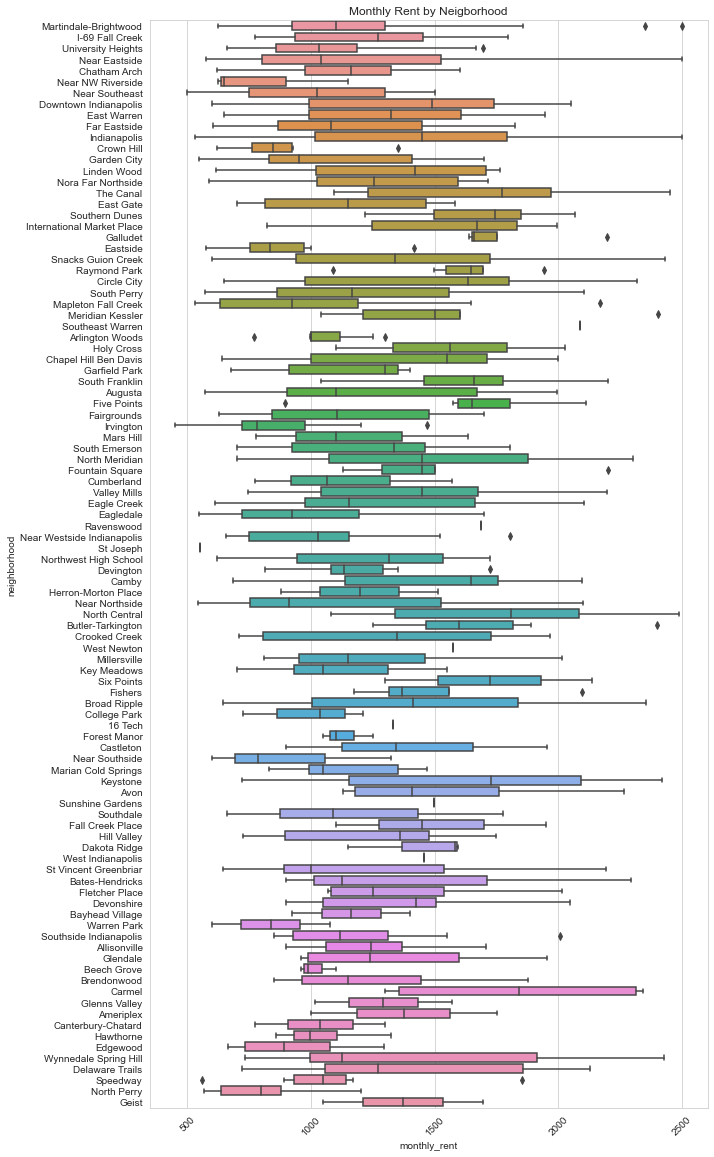

In [107]:
ax, fig= plt.subplots(figsize=(10,20))

ax = sns.boxplot(data=df_final_final,  y='neighborhood', x='monthly_rent');

ax.set_title('Monthly Rent by Neigborhood')
plt.xticks(rotation=45);

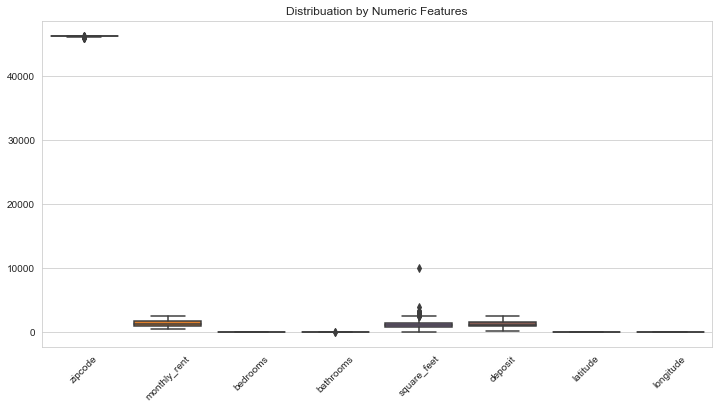

In [108]:
ax, fig= plt.subplots(figsize=(12,6))

ax= sns.boxplot(data=df_final_final);

ax.set_title('Distribuation by Numeric Features')
plt.xticks(rotation=45);

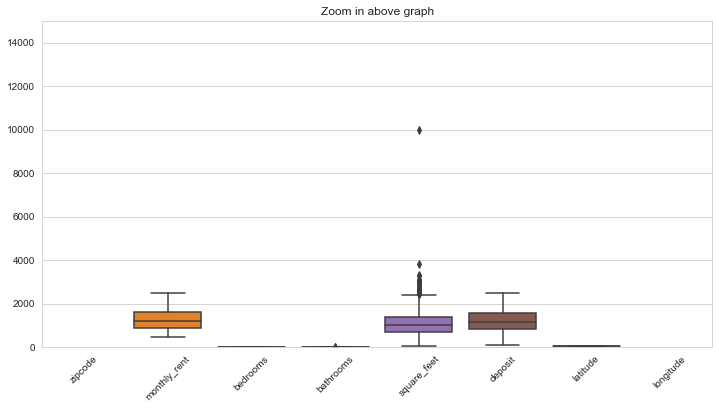

In [109]:
ax, fig= plt.subplots(figsize=(12,6))

ax= sns.boxplot(data=df_final_final);


ax.set_title('Zoom in above graph')

ax.set_ylim(0,15000)
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Monthly Rent vs Bedrooms')

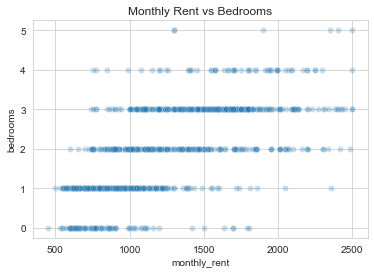

In [110]:
ax = sns.scatterplot(data=df_final_final, x='monthly_rent', y='bedrooms',alpha=.25);
ax.set_title('Monthly Rent vs Bedrooms')

Text(0.5, 1.0, 'Monthly Rent vs Bathrooms')

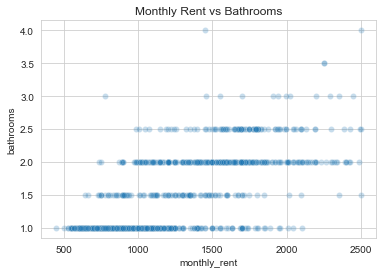

In [111]:
ax = sns.scatterplot(data=df_final_final, x='monthly_rent', y='bathrooms',alpha=.25);
ax.set_title('Monthly Rent vs Bathrooms')

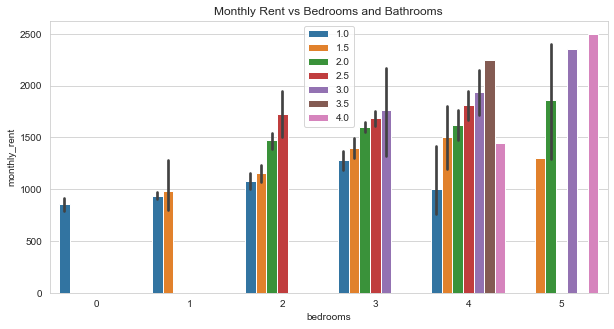

In [112]:
ax, fig= plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df_final_final, y='monthly_rent', x='bedrooms',hue = 'bathrooms');


ax.set_title('Monthly Rent vs Bedrooms and Bathrooms')
ax.legend()

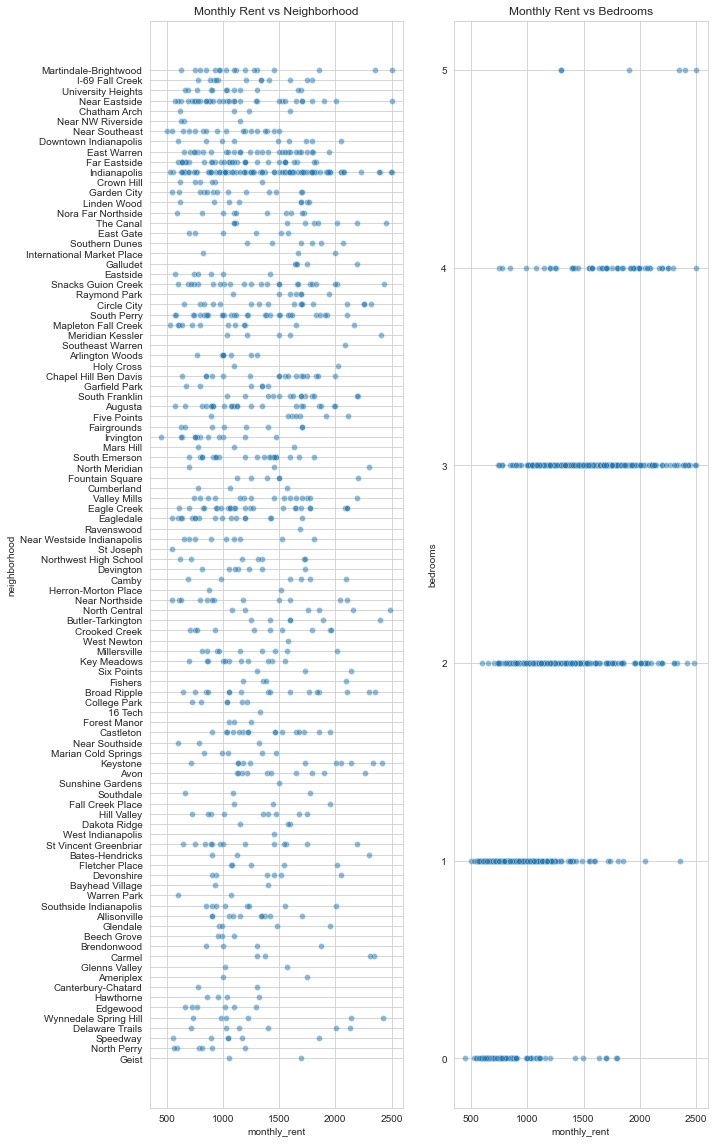

In [113]:
fig,axes= plt.subplots(1,2,figsize=(10,20),sharey=False)

# sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')

ax=sns.scatterplot(ax=axes[0],data=df_final_final, x='monthly_rent', y='neighborhood',alpha=.5);
ax.set_title('Monthly Rent vs Neighborhood');

ax=sns.scatterplot(ax=axes[1],data=df_final_final, x='monthly_rent', y='bedrooms',alpha=.5);
ax.set_title('Monthly Rent vs Bedrooms');



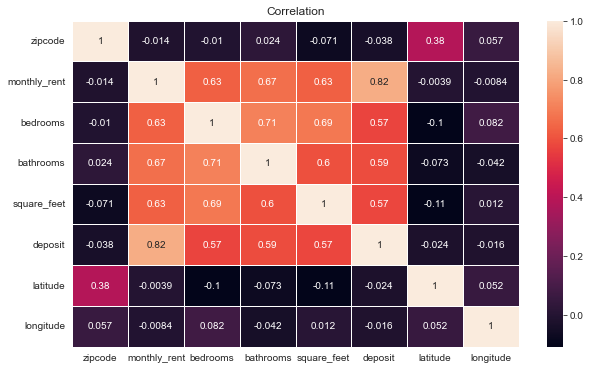

In [114]:
ax, fig= plt.subplots(figsize=(10,6))
ax= sns.heatmap(data=df_final_final.corr(), annot=True, linewidth=1);


ax.set_title('Correlation');

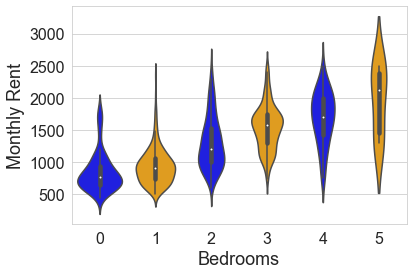

In [115]:
#Violin plot gives a smooth contour and works better for this many data points as opposed to swarmplot.
sns.violinplot(data=df_final_final,
               x = 'bedrooms',
               y = 'monthly_rent',
            palette=['blue', 'orange'])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Bedrooms", fontsize=18)
plt.ylabel("Monthly Rent", fontsize=18)

plt.show()

In [116]:
df_final_final.head()

,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,neighborhood
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.000,679.000,25,33,705,39.801,-86.126,Martindale-Brightwood
3,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.000,2500.000,54,33,1795,39.890,-86.045,I-69 Fall Creek
4,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.000,1439.000,29,32,1095,39.722,-86.121,University Heights
5,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.500,1500.000,67,38,800,39.783,-86.113,Near Eastside
6,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.000,1400.000,74,53,1600,39.781,-86.146,Chatham Arch


In [117]:
for neighbor in np.unique(df_final_final.neighborhood):
    print(neighbor,':', len(df_final_final[df_final_final.neighborhood == neighbor]))

16 Tech : 1
Allisonville : 10
Ameriplex : 2
Arlington Woods : 8
Augusta : 23
Avon : 10
Bates-Hendricks : 3
Bayhead Village : 2
Beech Grove : 3
Brendonwood : 4
Broad Ripple : 16
Butler-Tarkington : 6
Camby : 6
Canterbury-Chatard : 2
Carmel : 4
Castleton : 16
Chapel Hill Ben Davis : 17
Chatham Arch : 4
Circle City : 17
College Park : 6
Crooked Creek : 10
Crown Hill : 6
Cumberland : 3
Dakota Ridge : 3
Delaware Trails : 6
Devington : 7
Devonshire : 6
Downtown Indianapolis : 9
Eagle Creek : 24
Eagledale : 17
East Gate : 6
East Warren : 28
Eastside : 6
Edgewood : 6
Fairgrounds : 8
Fall Creek Place : 3
Far Eastside : 31
Fishers : 4
Five Points : 7
Fletcher Place : 5
Forest Manor : 3
Fountain Square : 6
Galludet : 5
Garden City : 13
Garfield Park : 6
Geist : 2
Glendale : 4
Glenns Valley : 2
Hawthorne : 4
Herron-Morton Place : 2
Hill Valley : 9
Holy Cross : 2
I-69 Fall Creek : 12
Indianapolis : 81
International Market Place : 3
Irvington : 12
Key Meadows : 11
Keystone : 11
Linden Wood : 8
Maple

In [118]:
df_final_final.to_csv (r'apartments_final.csv', index = False, header=True)